<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1>Histogram and Intensity Transformations</h1>


Estimated time needed: **40** minutes


<h2>Objectives</h2>


Pixel Transforms are operations you perform one pixel at a time. In this lab, you will start by creating histograms. Histograms display the intensity of the image and can be used to optimize image characteristics. You will then apply Intensity Transformations, making objects easier to see by improving image contrast and brightness. In the last portion of the lab, you will use thresholding to segment objects from images.


<ul>
    <li><a href='#PT'>Pixel Transforms  </a>
        <ul>
            <li>Histograms </li>
            <li>Intensity Transformations</li>
            <li>Thresholding and Simple Segmentation </li>   
</ul>


----


Download the image for the lab


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/goldhill.bmp -O goldhill.bmp
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg -O cameraman.jpeg
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/zelda.png -O zelda.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/mammogram.png -O mammogram.png

--2023-09-27 03:22:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lenna.png’

lenna.png           100%[===================>] 462.73K  --.-KB/s    in 0.01s   

2023-09-27 03:22:45 (44.3 MB/s) - ‘lenna.png’ saved [473831/473831]

--2023-09-27 03:22:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-cours

We will be using these imported functions in the lab


In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

First, lets define a helper function to plot two images side-by-side. You will not need to understand this code at this moment, but this function will be used repeatedly in this tutorial to showcase the results. 


In [2]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

Lets define another helper function. The following one will plot two histograms side-by-side. Again, you do not need to understand the body of this function at this moment.


In [3]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

# Histograms  


A histogram counts the number of occurrences of the intensity values of pixels, and it's a useful tool for understanding and manipulating images. We use <code>cv.calcHist()</code> to generate the histogram. Here are the parameter values:
<p>
    <code>cv2.calcHist(CV array:<b>[image]</b> this is the image channel:<b>[0]</b>,for this course it will always be <b>[None]</b>,the number of bins:<b>[L]</b>,the range of index of bins:<b>[0,L-1]</b>) </code>   
</p>
For real images, <code>L</code> is <code>256</code>.


## Toy Example


Consider the toy array with intensity values ranging from 0 to 2. We can create a histogram. Its first element is the number of zeros in the image (in this case, 1); its second element is the number of ones in the image (in this case, 5), and so on.


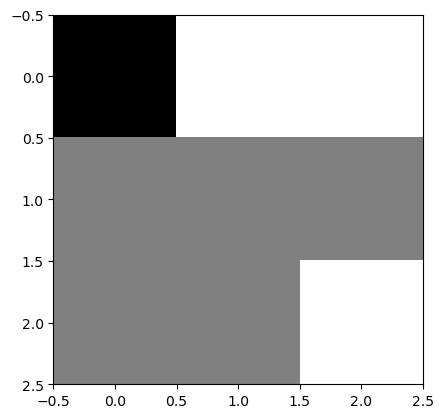

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [4]:
toy_image = np.array([[0,2,2],[1,1,1],[1,1,2]],dtype=np.uint8)
plt.imshow(toy_image, cmap="gray")
plt.show()
print("toy_image:",toy_image)

We can use the <code>caclHist</code> function, in this case, we use only three bins as there are only three values, and the index of the bins are from 1 to 3.

**TODO:** @Joe 


toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


<BarContainer object of 3 artists>

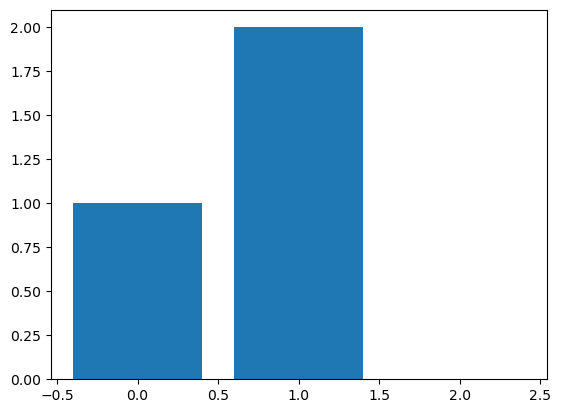

In [19]:
intensity_values = [0,1,2]
print("toy_image:",toy_image)
plt.bar(intensity_values, cv2.calcHist(toy_image,[0],None,[3],[0,4])[:,0])

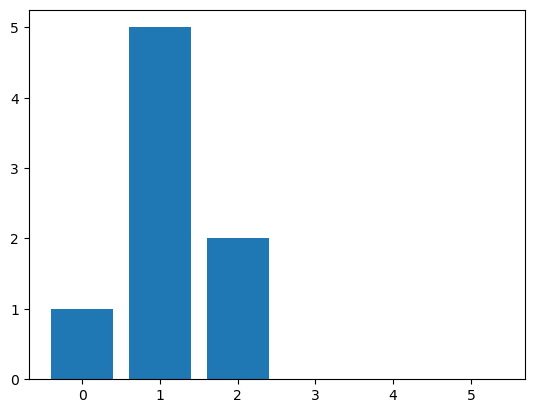

In [17]:
plt.bar([x for x in range(6)],[1,5,2,0,0,0])
plt.show()

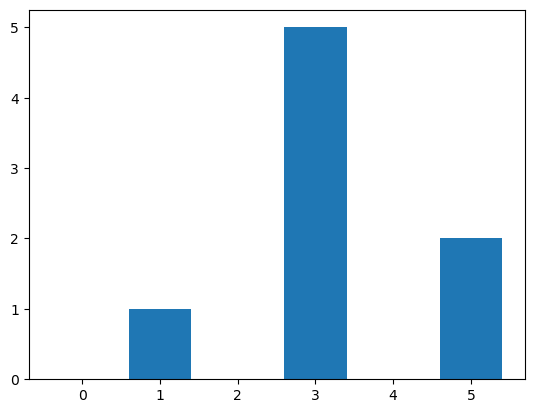

In [7]:
plt.bar([x for x in range(6)],[0,1,0,5,0,2])
plt.show()

The histogram is a function where $h[r]$  where   $r \in {0,1,2} $. In the above example  $h[0]=1$,$h[1]=5$ and $h[2]=3$


## Gray Scale Histograms 




Histograms are used in grayscale images.  Grayscale images are used in many applications, including medical and industrial. Color images are split into luminance and chrominance. The luminance is the grayscale portion and is usually processed in many applications. Consider the following "Gold Hill" image:


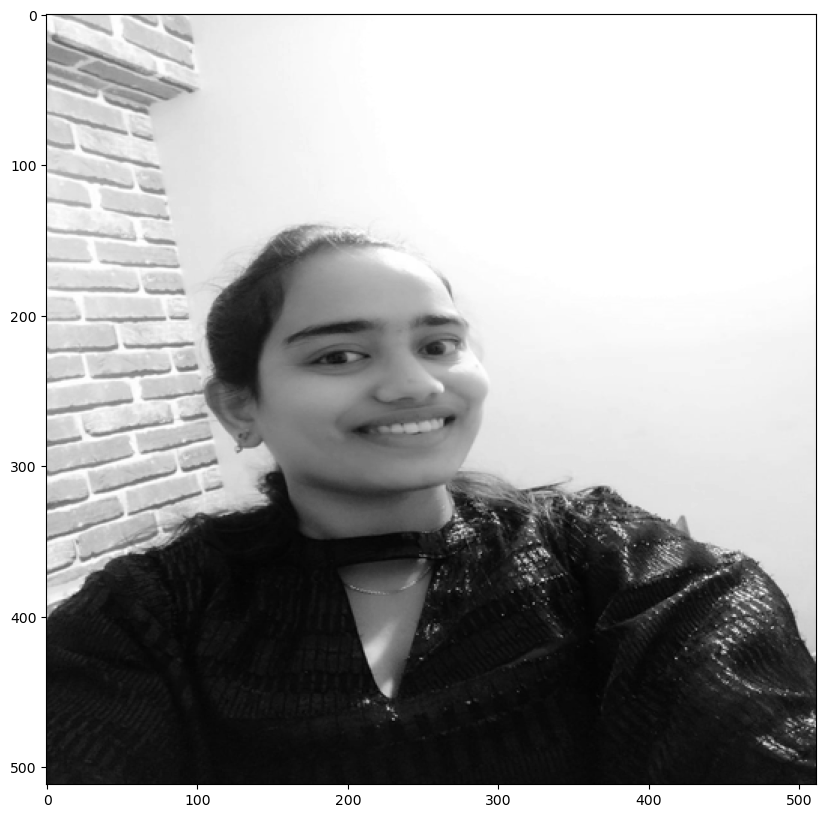

In [20]:
image = cv2.imread("resized_image.png",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(image,cmap="gray")
plt.show()

We can calculate the histogram using the `calcHist` function from the `cv2` module as follows, the shape is 256.


In [22]:
hist = cv2.calcHist(image,[0], None, [256], [0,256])

We can plot it as a bar graph, the $x$-axis are the pixel intensities and the $y$-axis is the number of times of occurrences that the corresponding pixel intensity value on $x$-axis occurred.


In [24]:
print("Image shape",image.shape)
print("Hist",hist)
print("Hist shape",hist.shape)

Image shape (512, 512)
Hist [[  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  

Note : We observe strange results! As image has more black in it, ideally 0 intensity should have more occurences, but er saw 256 has more occurence. This is because by default opencv reads image as BGR format(Not RGB), so o/p is quite opposite to the way we expected

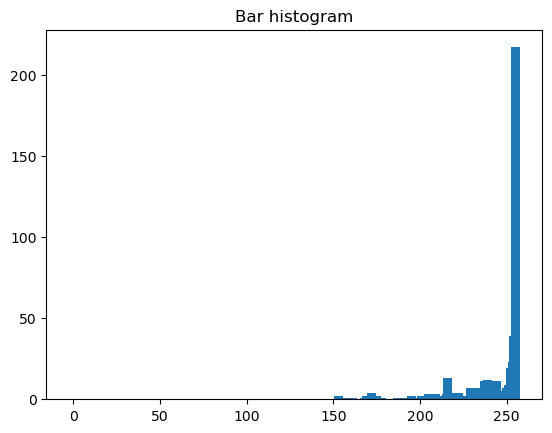

In [25]:
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title("Bar histogram")
plt.show()

The histogram is a function where $h[r]$  where   $r \in {0,1,..,255} $.


We can convert it to a probability mass function by normalizing it by the number of pixels:


In [26]:
PMF = hist / (image.shape[0] * image.shape[1])

We can plot as a continuous function:


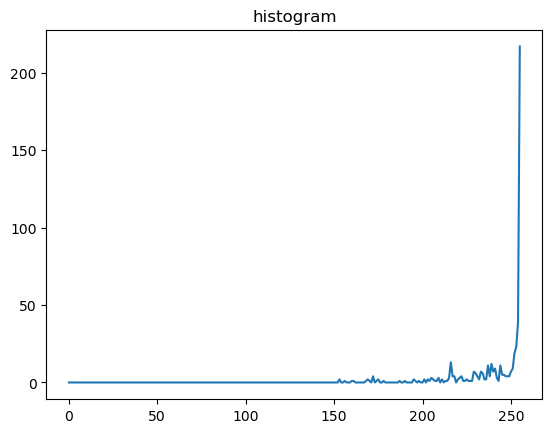

In [27]:
plt.plot(intensity_values,hist)
plt.title("histogram")
plt.show()


We can also apply a histogram to each image color channel:


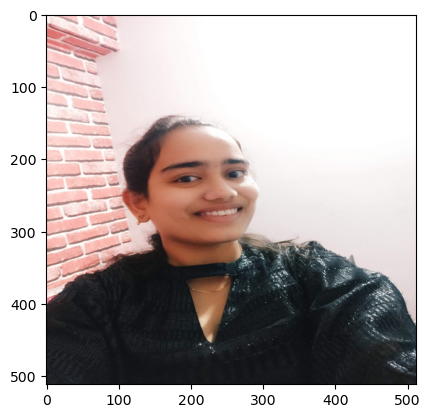

In [31]:
image = cv2.imread("resized_image.png")
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In the loop, the value for <code>i</code> specifies what color channel <code>calcHist</code> is going to calculate the histogram for.   


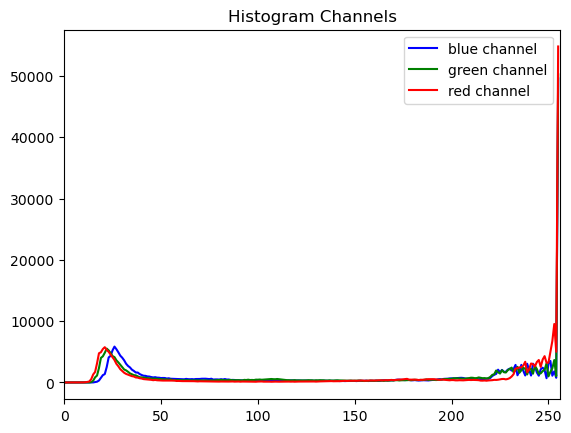

In [32]:
color = ('blue','green','red')
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(intensity_values,histr,color = col,label=col+" channel")
    
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

#  Intensity Transformations


It's helpful to think of an image as a function $f(x,y)$ instead of an array at this point, where `x` is the row index and `y` is the column index. You can apply a transformation $T$ to the image and get a new image: 
$$
g(x,y)=T(f(x,y))
$$

An Intensity Transformation depends on only one single point $(x,y)$. For example, you can apply a linear transform $g(x,y) = 2f(x,y) + 1$; this will multiply each image pixel by two and add one.

As the Intensity transforms only depend on one value; as a result, it is sometimes referred to as a gray-level mapping. The variable if $r$ is the gray level intensity, similar to the histogram values. The new output s is given by:

$$
s=T(r)
$$


## Image Negatives


Consider an image with $L$ intensity values ranging from $[0,L-1]$.  We can reverse the intensity levels by applying the following:
$$
g(x,y)=L-1-f(x,y)
$$

Using the intensity transformation function notation 
$$
s = L - 1 - r
$$

This is called the image negative. For $L= 256$ the formulas simplifys to:
$$
g(x,y)=255-f(x,y) \qquad \mbox{and} \qquad s=255-r
$$


We can perform intensity transformation on the toy image where $L = 3$:


In [34]:
neg_toy_image = -1 * toy_image + 255

print("toy image\n", toy_image)
print("image negatives\n", neg_toy_image)

toy image
 [[0 2 2]
 [1 1 1]
 [1 1 2]]
image negatives
 [[255 253 253]
 [254 254 254]
 [254 254 253]]


We see darker intensity’s become brighter and brighter become darker, middle intensity’s remain the same.


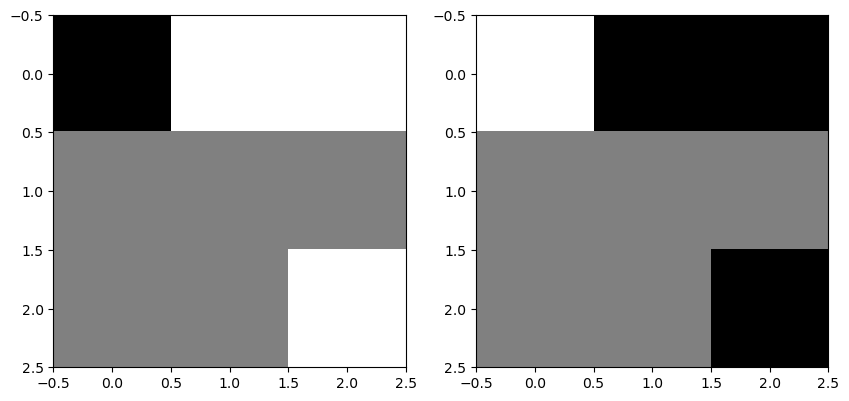

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [35]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1) 
plt.imshow(toy_image,cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(neg_toy_image,cmap="gray")
plt.show()
print("toy_image:",toy_image)

Reversing image intensity has many applications, including making it simpler to analyze medical images. Consider the mammogram with micro-calcifications on the upper quadrant:


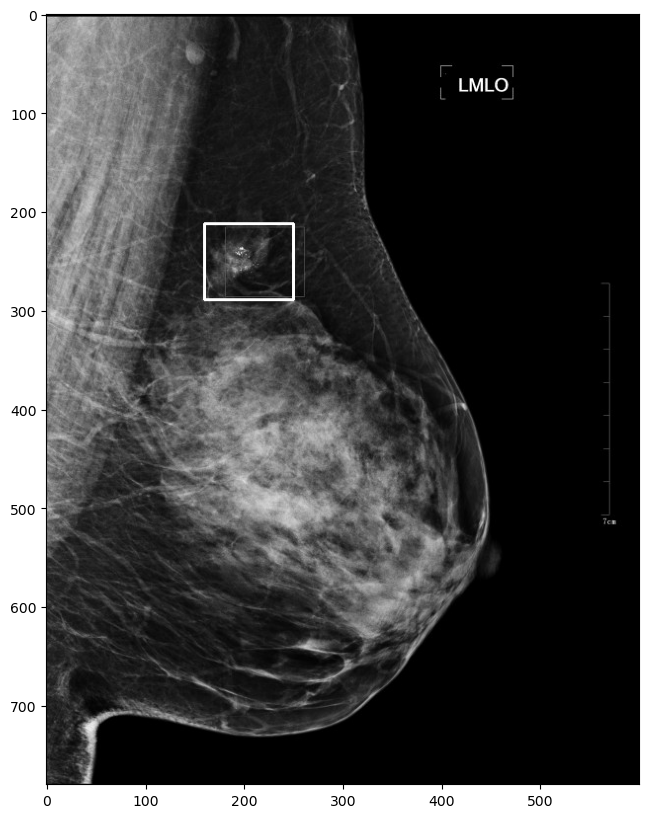

In [36]:
image = cv2.imread("mammogram.png", cv2.IMREAD_GRAYSCALE)
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color = (255), thickness=2) 

plt.figure(figsize = (10,10))
plt.imshow(image, cmap="gray")
plt.show()

We can apply the intensity transformation:


In [37]:
img_neg = -1 * image + 255

We see the micro-calcifications in the image negatives is easier it is to analyze:


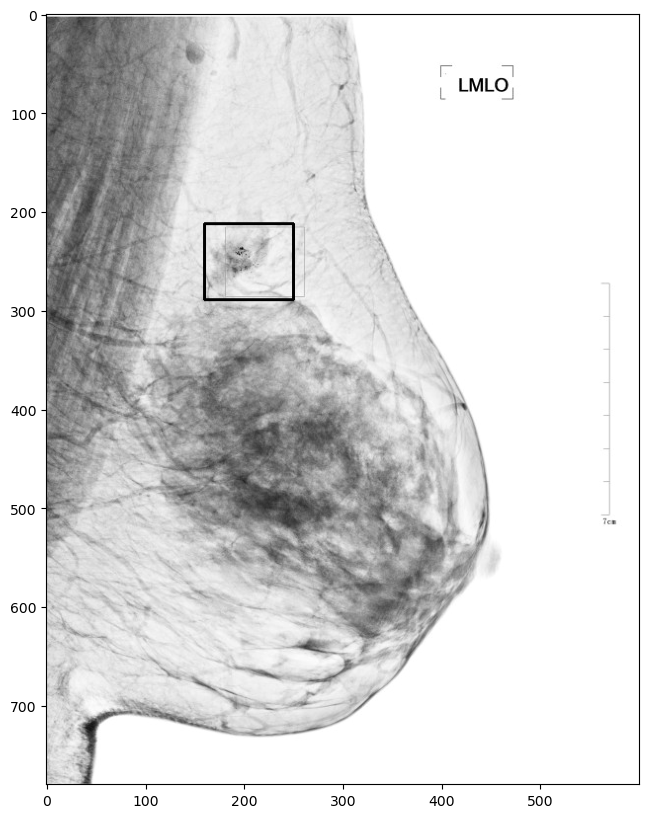

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(img_neg, cmap = "gray")
plt.show()

## Brightness and contrast adjustments


We can use multiplication by $\alpha$ for contrast control and addition by $\beta$ to improve brightness control. This applies the Intensity Transformation as well. The image is $f(x,y)$ and the transformed image is $g(x,y)$, where $g(x,y) = \alpha f(x,y) + \beta$.


 Rather than implementing via array operations, we use the function  <code>convertScaleAbs</code>. It scales, calculates absolute values, and converts the result to 8-bit so the values fall between $[0,255]$. For brightness control, we can set $\alpha$ to 1 and $\beta$ to 100: Remember the Good Hill image, it’s dark and hazy so let's see if we can improve it. 


In [43]:
image = cv2.imread("resized_image.png",cv2.IMREAD_GRAYSCALE)
alpha = 1 # Simple contrast control
beta = 100   # Simple brightness control   
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

We can plot the brighter image, it's much brighter :


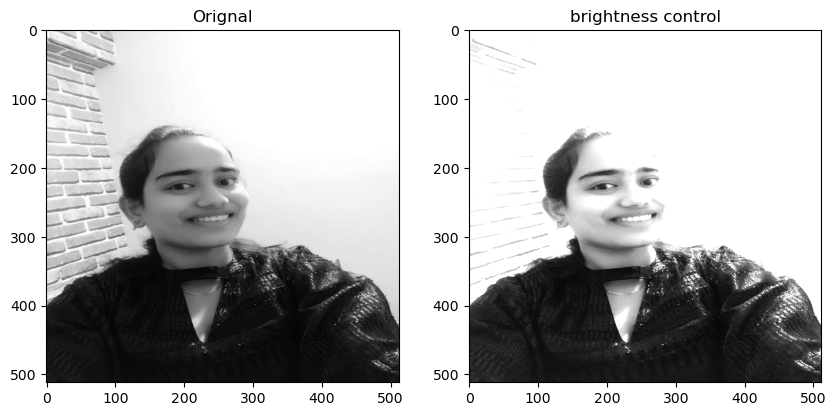

In [44]:
plot_image(image, new_image, title_1 = "Orignal", title_2 = "brightness control")

We see the brighter image's histogram is shifted:     


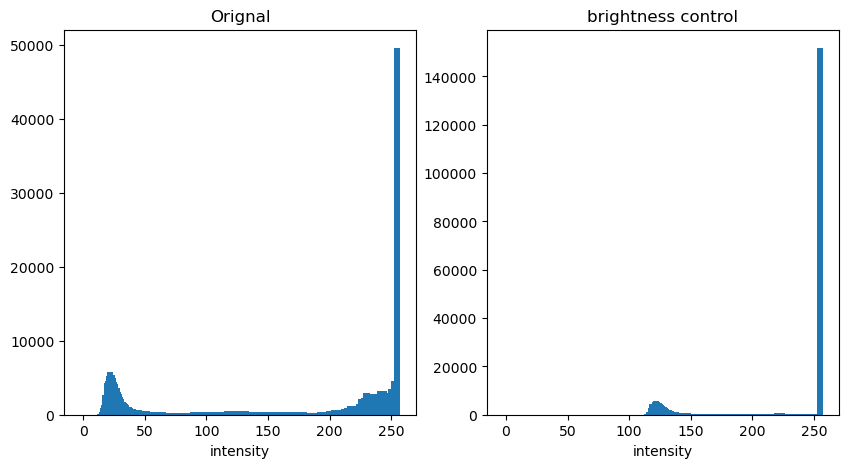

In [45]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "brightness control")

We can increase the contrast by increasing $\alpha$:


In [46]:
plt.figure(figsize=(10,5))
alpha = 2# Simple contrast control
beta = 0 # Simple brightness control   # Simple brightness control
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

<Figure size 1000x500 with 0 Axes>

We can plot the image and its corresponding histogram:


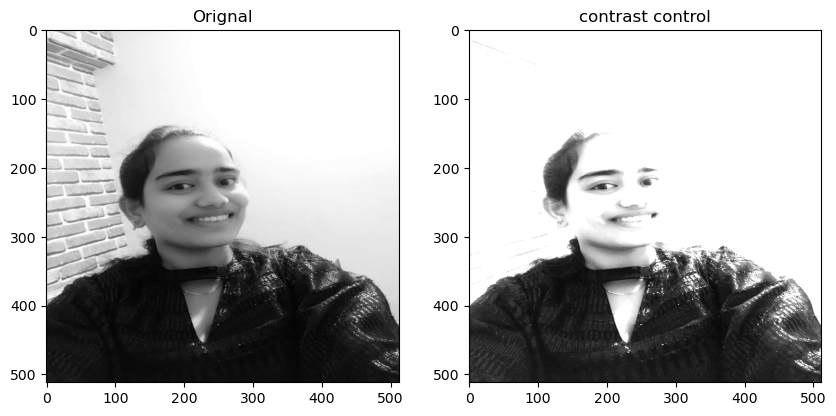

In [47]:
plot_image(image,new_image,"Orignal","contrast control")

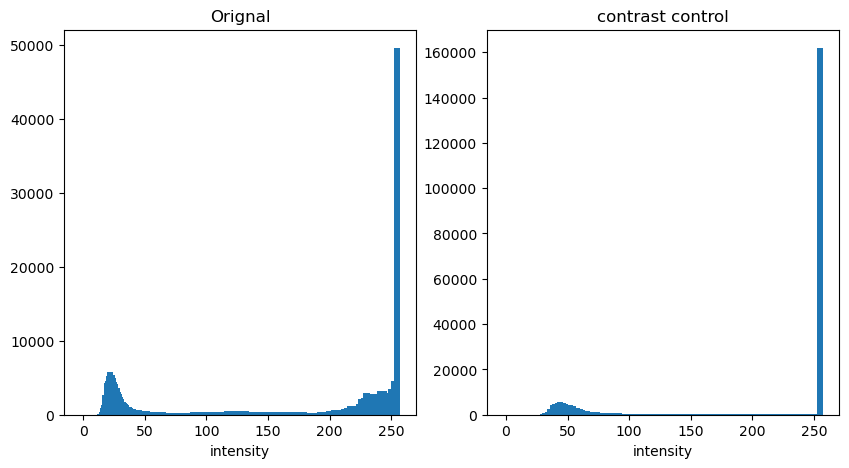

In [48]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image,"Orignal","contrast control")

When plotting the image we see it's too bright. We can adapt the brightness by making the image darker and increasing the contrast at the same time. 


In [49]:
plt.figure(figsize=(10,5))
alpha = 3 # Simple contrast control
beta = -200  # Simple brightness control   
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

<Figure size 1000x500 with 0 Axes>

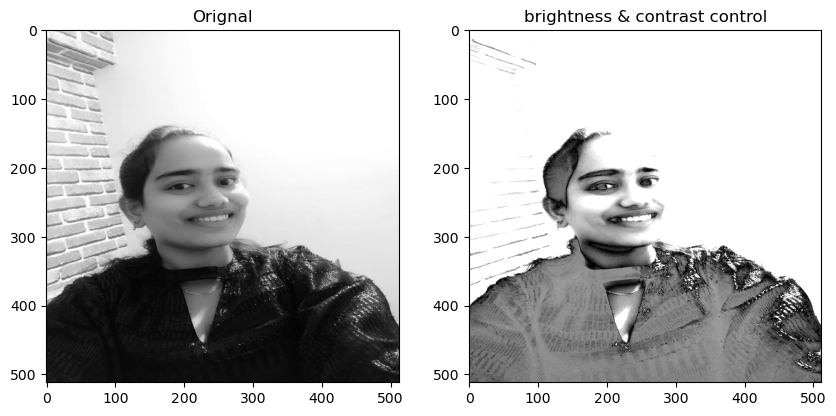

In [50]:
plot_image(image, new_image, "Orignal", "brightness & contrast control")

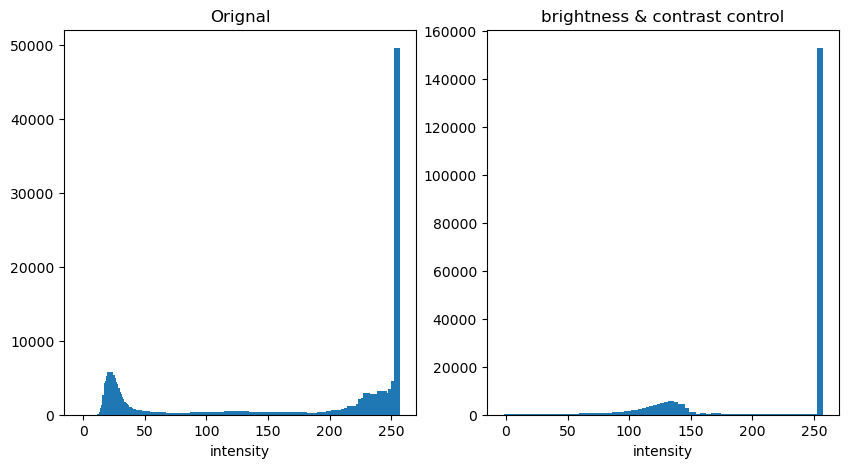

In [51]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "brightness & contrast control")

There are other nonlinear methods to improve contrast and brightness, these methods have different sets of parameters. In general, it’s difficult to manually adjust the contrast and brightness parameter, but there are algorithms that improve contrast automatically.


## Histogram Equalization


Histogram Equalization increases the contrast of images, by stretching out the range of the grayscale pixels; It does this by flatting  the histogram. We simply apply the function <code>cv2.equalizeHist</code>.


In [52]:
varsha = cv2.imread("resized_image.png",cv2.IMREAD_GRAYSCALE)
new_image = cv2.equalizeHist(varsha)

We can compare the image before and after Histogram Equalization, we see the contrast is improved. We see after the Histogram Equalization is applied, the histogram is stretched out:


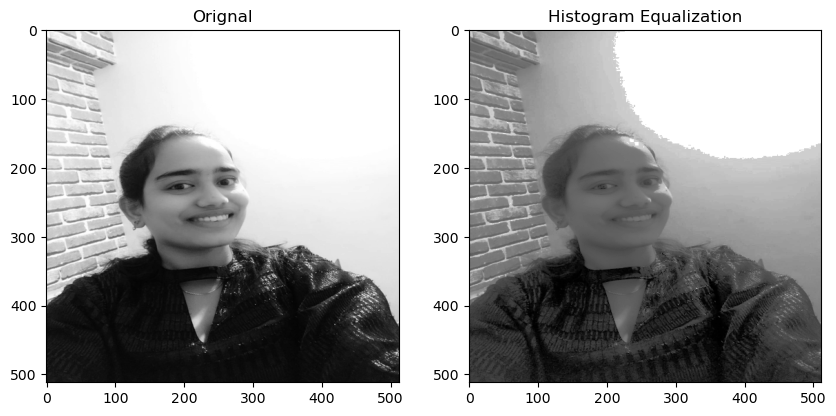

In [53]:
plot_image(varsha,new_image,"Orignal","Histogram Equalization")

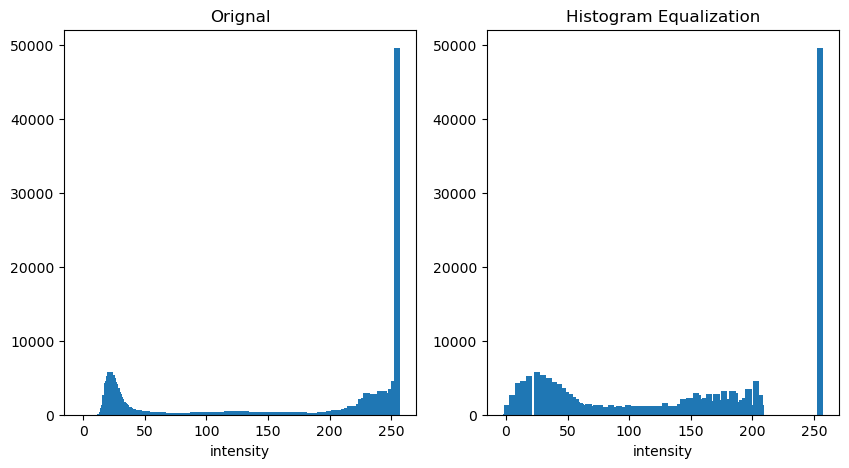

In [54]:
plt.figure(figsize=(10,5))
plot_hist(varsha, new_image,"Orignal","Histogram Equalization")

## Thresholding and Simple Segmentation 


Thresholding is used in image segmentation this means extracting objects from an image. Image segmentation is used in many applications including extracting text, medical imaging, and industrial imaging.
Thresholding an image takes a threshold; If a particular pixel (i,j) is greater than that threshold it will set that pixel to some value usually 1 or 255, otherwise, it will set it to another value, usually zero. We can write a Python function that will perform thresholding and output a new image given some input grayscale image:


In [55]:
def thresholding(input_img,threshold,max_value=255, min_value=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)
        
    for i  in range(N):
        for j in range(M):
            if input_img[i,j]> threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
                
    return image_out                             

Consider the following toy image:


In [56]:
toy_image

array([[0, 2, 2],
       [1, 1, 1],
       [1, 1, 2]], dtype=uint8)

We can apply thresholding, by setting all the values less than two to zero. 


In [57]:
threshold = 1
max_value = 2
min_value = 0
thresholding_toy = thresholding(toy_image, threshold=threshold, max_value=max_value, min_value=min_value)
thresholding_toy

array([[0, 2, 2],
       [0, 0, 0],
       [0, 0, 2]], dtype=uint8)

We can compare the two images. In the new image we see all the gray values are now black:


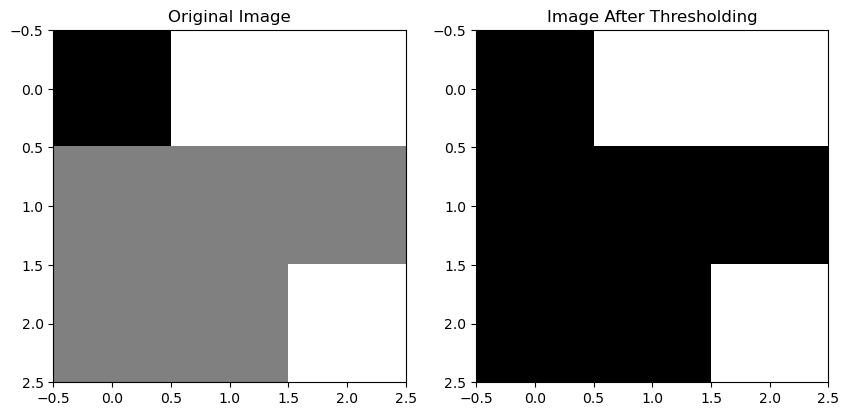

In [58]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(toy_image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholding_toy, cmap="gray")
plt.title("Image After Thresholding")
plt.show()

Consider the cameraman image:


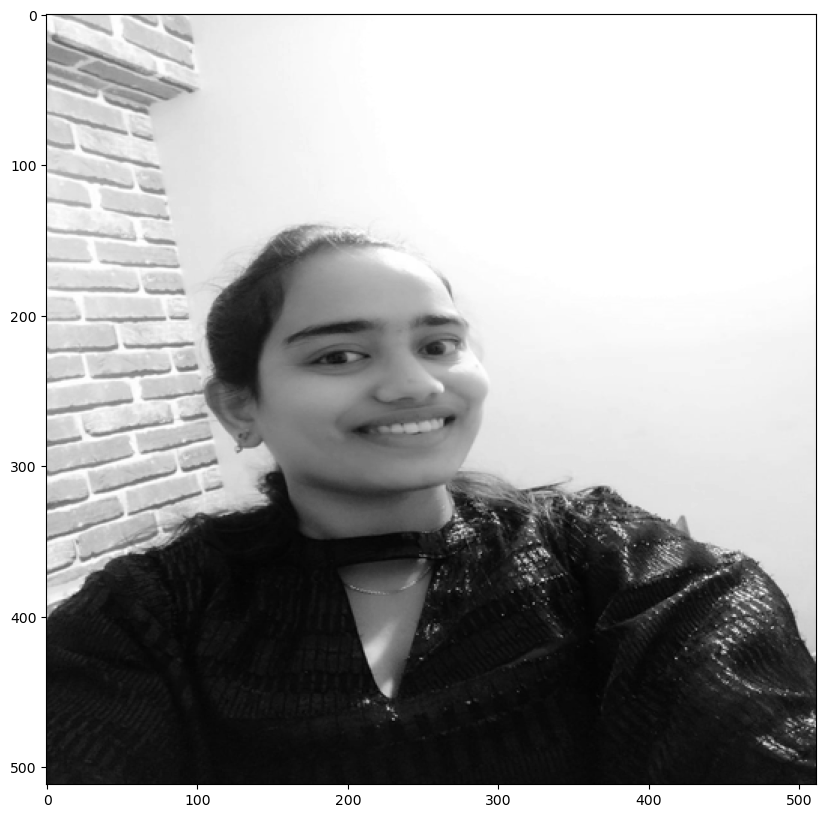

In [59]:
#image = cv2.imread("cameraman.jpeg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap="gray")
plt.show()

We can see the histogram as two peeks, this means that there is a large proportion of pixels in those two ranges:


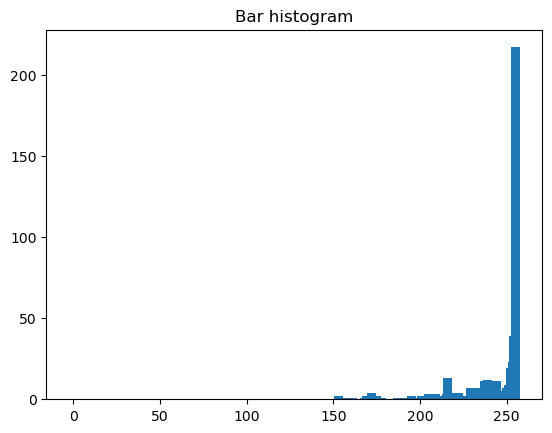

In [60]:
hist = cv2.calcHist(image, [0], None, [256], [0, 256])
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title("Bar histogram")
plt.show()

The cameraman corresponds to the darker pixels, therefore we can set the Threshold in such a way as to segment the cameraman. In this case, it looks to be slightly less than 90, let’s give it a try:


In [61]:
threshold = 140
max_value = 255
min_value = 0
new_image = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)

We see the pixels corresponding to the cameraman are now zero and the rest are set to 255:


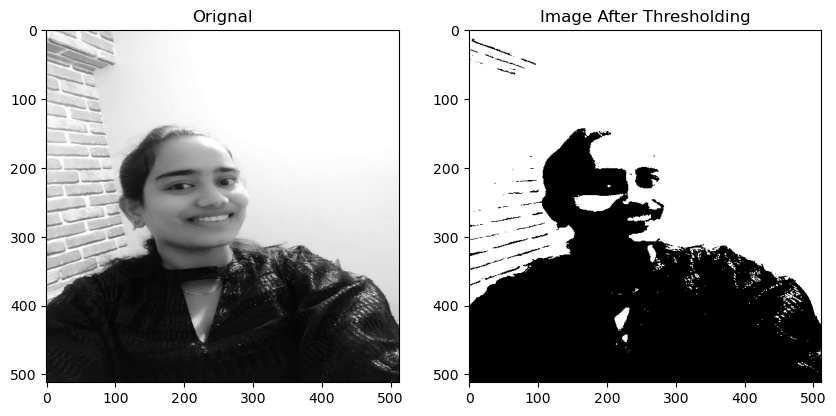

In [62]:
plot_image(image, new_image, "Orignal", "Image After Thresholding")

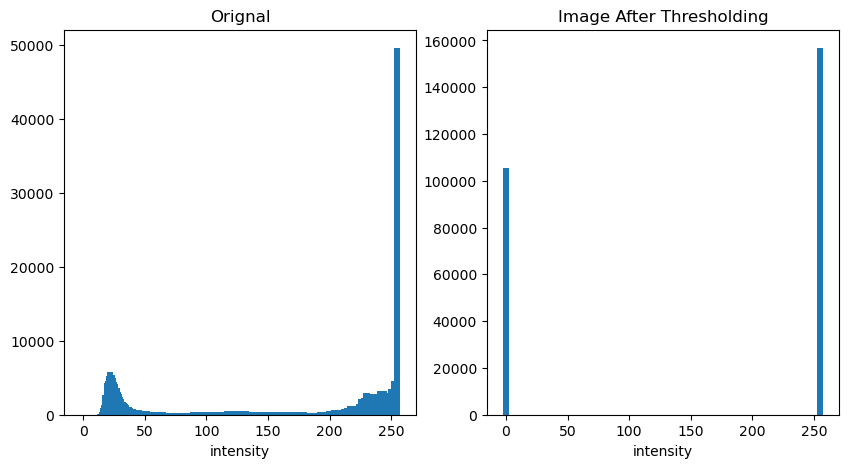

In [63]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "Image After Thresholding")

The function <code>cv.threshold</code> Applies a threshold to the gray image, with the following parameters:


<code>cv.threshold(grayscale image, threshold value, maximum value to use, thresholding type )</code>


The  parameter thresholding type is the type of thresholding we would like to perform. For example, we have basic thresholding: <code>cv2.THRESH_BINARY</code> this is the type we implemented in the function <code>thresholding</code>, it just a number:


In [64]:
cv2.THRESH_BINARY

0

We can apply thresholding to the image as follows:


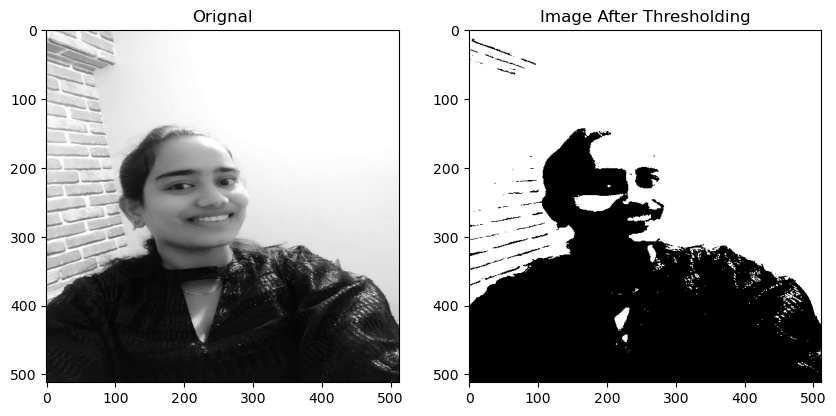

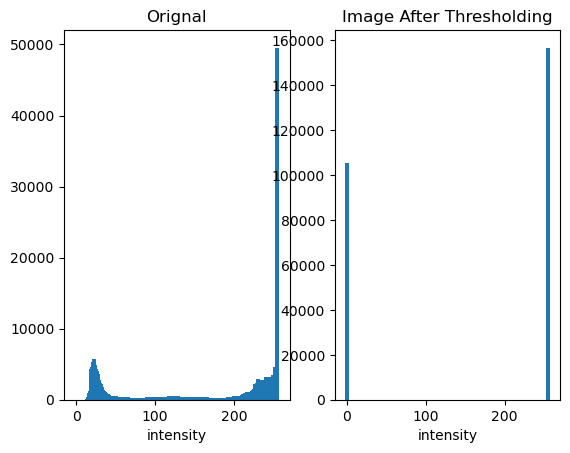

In [65]:
ret, new_image = cv2.threshold(image,threshold,max_value,cv2.THRESH_BINARY)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

<code>ret</code> is the threshold value and <code>new_image</code> is the image after thresholding has been applied. There are different threshold types, for example, cv2.THRESH_TRUNC will not change the values if the pixels are less than the threshold value:


Threshold value 86.0


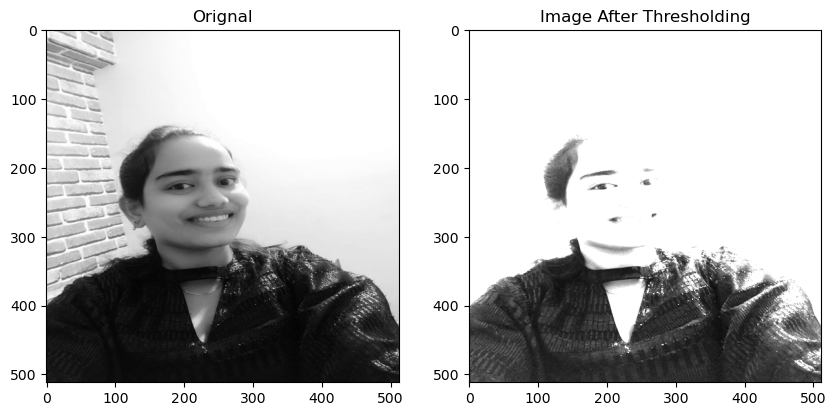

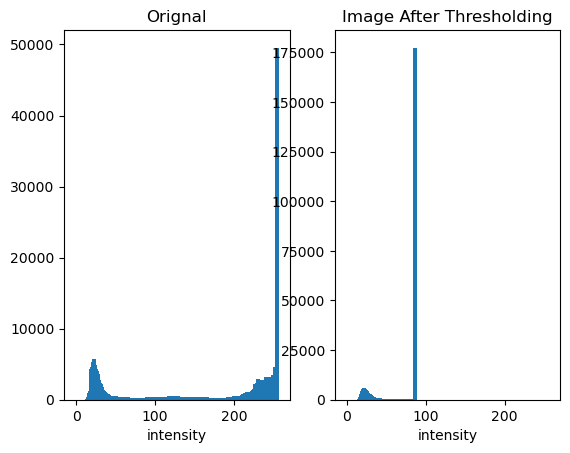

In [67]:
ret, new_image = cv2.threshold(image,86,255,cv2.THRESH_TRUNC)
print("Threshold value",ret)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

We see that the darker elements have not changed and the lighter values are set to 255.


 Otsu's method <code>cv2.THRESH_OTSU</code> avoids having to choose a value and determines it automatically, using the histogram.


In [ ]:
ret, otsu = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
print("Thre")
plot_image(image,otsu,"Orignal","Otsu")
plot_hist(image, otsu,"Orignal"," Otsu's method")

We assign the first row of pixels of the original array to the new array's last row. We repeat the process for every row, incrementing the row number for the original array and decreasing the new array's row index assigning the pixels accordingly.


In [ ]:
ret

<h2>Authors</h2>


 [Joseph Santarcangelo](https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2022-01-01) has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


# References 


[1]  Images were taken from: https://homepages.cae.wisc.edu/~ece533/images/
    
[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2022-01-01'>Pillow Docs</a>

[3]  <a href='https://opencv.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2022-01-01'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).

[5 ] Jian, Wushuai, Xueyan Sun, and Shuqian Luo. "Computer-aided diagnosis of breast microcalcifications based on dual-tree complex wavelet transform." Biomedical engineering online 11.1 (2012): 1-12.


<h2>Change Log</h2>


<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2020-07-20</td>
        <td>0.2</td>
        <td>Azim</td>
        <td>Modified Multiple Areas</td>
    </tr>
    <tr>
        <td>2020-07-17</td>
        <td>0.1</td>
        <td>Azim</td>
        <td>Created Lab Template</td>
    </tr>
</table>


Copyright © 2020 IBM Corporation. All rights reserved.
